In [1]:
#@title Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [3]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [7]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               


def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [5]:
#@title Define the plotting function

def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/30
136/136 [==============================] - 2s 4ms/step - loss: 37261.4570 - root_mean_squared_error: 193.0323 - val_loss: 45159.4531 - val_root_mean_squared_error: 212.5075
Epoch 2/30
136/136 [==============================] - 0s 2ms/step - loss: 21167.9961 - root_mean_squared_error: 145.4922 - val_loss: 26037.4570 - val_root_mean_squared_error: 161.3613
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 11202.9375 - root_mean_squared_error: 105.8439 - val_loss: 14159.1455 - val_root_mean_squared_error: 118.9922
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 6989.3442 - root_mean_squared_error: 83.6023 - val_loss: 9522.7764 - val_root_mean_squared_error: 97.5847
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6514.2051 - root_mean_squared_error: 80.7106 - val_loss: 9270.2910 - val_root_mean_squared_error: 96.2823
Epoch 6/30
136/136 [==============================] - 0s 2ms/step - loss: 6514.0796 - ro

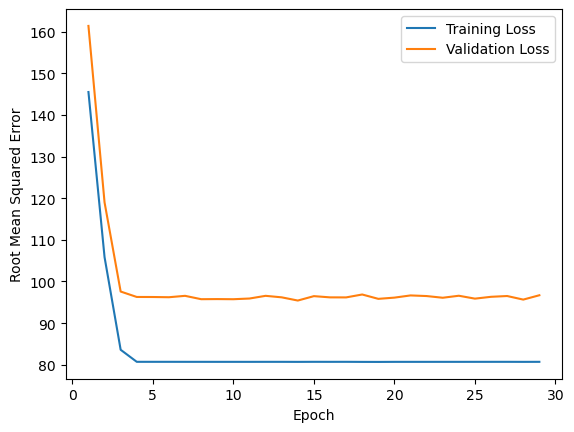

In [8]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

Epoch 1/70
136/136 [==============================] - 1s 3ms/step - loss: 42947.8164 - root_mean_squared_error: 207.2386 - val_loss: 33335.1680 - val_root_mean_squared_error: 182.5792
Epoch 2/70
136/136 [==============================] - 0s 2ms/step - loss: 25042.5078 - root_mean_squared_error: 158.2482 - val_loss: 18575.6680 - val_root_mean_squared_error: 136.2926
Epoch 3/70
136/136 [==============================] - 0s 2ms/step - loss: 13393.6309 - root_mean_squared_error: 115.7309 - val_loss: 10033.3984 - val_root_mean_squared_error: 100.1668
Epoch 4/70
136/136 [==============================] - 0s 2ms/step - loss: 7899.4385 - root_mean_squared_error: 88.8788 - val_loss: 7336.5610 - val_root_mean_squared_error: 85.6537
Epoch 5/70
136/136 [==============================] - 0s 2ms/step - loss: 6955.1460 - root_mean_squared_error: 83.3975 - val_loss: 7275.2881 - val_root_mean_squared_error: 85.2953
Epoch 6/70
136/136 [==============================] - 0s 2ms/step - loss: 6949.2241 - ro

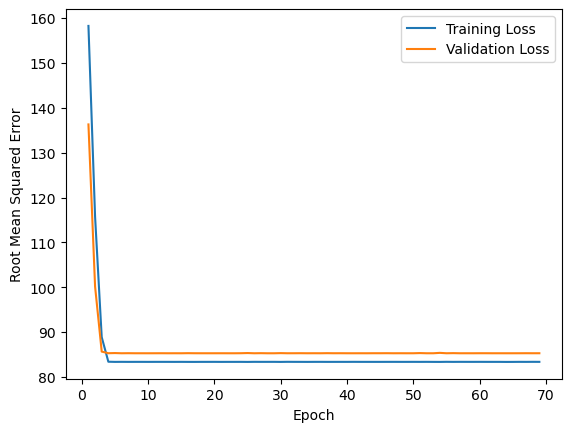

In [9]:
#@title Double-click to view the complete implementation.

# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Shuffle the examples.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index)) 

# Invoke the functions to build and train the model. Train on the shuffled
# training set.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [10]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 2ms/step - loss: 7012.6245 - root_mean_squared_error: 83.7414
